# Project: Wrangling and Analyze Data

In [1]:
# Import the necessary packages for this project

import pandas as pd
import numpy as np
import requests
import json
import matplotlib.pyplot as plt
%matplotlib inline
import tweepy
import os
from datetime import datetime

## Data Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [2]:
#Load the twitter-archive-enhanced.csv file 

twitter_archive = pd.read_csv('twitter-archive-enhanced.csv')

2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [3]:
#Download the image-predictions.tsv file programmatically from Udacity servers

url = "https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"
response = requests.get(url)

with open('image-predictions.tsv', mode ='wb') as file:
    file.write(response.content)

#Read TSV file
image_prediction = pd.read_csv('image-predictions.tsv', sep='\t' )

3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

All details of the twitter api to be used have been saved in a **twitter_auth.csv** file prior to starting this project. From this fill, we will extract the keys and secrets needed for this project

In [4]:
twitter_auth = pd.read_csv('twitter_auth.csv')

twitter_auth.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1 entries, 0 to 0
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   api_key        1 non-null      object
 1   api_secret     1 non-null      object
 2   access_token   1 non-null      object
 3   access_secret  1 non-null      object
 4   bearer_token   1 non-null      object
dtypes: object(5)
memory usage: 84.0+ bytes


Extract the values needed from the csv file. Note that they are the first values in each column.

In [5]:
# Use Twitter API to set up authentication for tweepy

consumer_key = twitter_auth.iloc[0,0]
consumer_secret = twitter_auth.iloc[0,1]
access_token = twitter_auth.iloc[0,2]
access_secret = twitter_auth.iloc[0,3]

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

In [6]:
# Check the number of values in twitter_archive
tweet_ids = twitter_archive.tweet_id.values
len(tweet_ids)

2356

In [7]:
# Query the Twitter API and store data on tweet_json.txt
with open('tweet_json.txt', 'w') as file: 
    for tweet_id in tweet_ids:
        try:
            tweet = api.get_status(tweet_id)
            # Convert to JSON and write
            json.dump(tweet._json, file)
            file.write("\n")
            
        except:  # If tweet was deleted return an error message
            print('ERROR: Error on tweet id {}'.format(tweet_id))
            e = os.sys.exc_info()[0]

ERROR: Error on tweet id 888202515573088257
ERROR: Error on tweet id 873697596434513921
ERROR: Error on tweet id 872668790621863937
ERROR: Error on tweet id 872261713294495745
ERROR: Error on tweet id 871879754684805121
ERROR: Error on tweet id 869988702071779329
ERROR: Error on tweet id 866816280283807744
ERROR: Error on tweet id 861769973181624320
ERROR: Error on tweet id 856602993587888130
ERROR: Error on tweet id 856330835276025856
ERROR: Error on tweet id 851953902622658560
ERROR: Error on tweet id 851861385021730816
ERROR: Error on tweet id 845459076796616705
ERROR: Error on tweet id 844704788403113984
ERROR: Error on tweet id 842892208864923648
ERROR: Error on tweet id 837366284874571778
ERROR: Error on tweet id 837012587749474308
ERROR: Error on tweet id 829374341691346946
ERROR: Error on tweet id 827228250799742977
ERROR: Error on tweet id 820837357901512704
ERROR: Error on tweet id 812747805718642688
ERROR: Error on tweet id 802247111496568832
ERROR: Error on tweet id 7791231

In [8]:
# Save only certain tweet elements in dataframe
elements_to_save = ['id','favorite_count', 'retweet_count']
# Create an empty list to convert to dataframe later
data = []

with open('tweet_json.txt', 'r') as readfile: 
    # Read in JSON line and convert to dict
    tweets = readfile.readline()
    
    # Read line by line into a dataFrame
    while tweets:
        tweet_dict = json.loads(tweets)
        # Create a smaller dict
        data_row = dict((k, tweet_dict[k]) for k in elements_to_save)
        data.append(data_row)
        
        # Read in JSON line and convert to dict
        tweets = readfile.readline()
        
            
    
tweet_json = pd.DataFrame.from_dict(data)

In [9]:
tweet_json.head()

,id,favorite_count,retweet_count
0,892420643555336193,33711,6975
1,892177421306343426,29233,5276
2,891815181378084864,21983,3466
3,891689557279858688,36807,7197
4,891327558926688256,35193,7721


## Assessing Data
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. Use **both** visual assessment
programmatic assessement to assess the data.


* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.



In [10]:
twitter_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [11]:
image_prediction.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [12]:
tweet_json.head()

,id,favorite_count,retweet_count
0,892420643555336193,33711,6975
1,892177421306343426,29233,5276
2,891815181378084864,21983,3466
3,891689557279858688,36807,7197
4,891327558926688256,35193,7721


## Visual Assessment

In [13]:
twitter_archive

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


In [14]:
image_prediction

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


In [15]:
tweet_json

,id,favorite_count,retweet_count
0,892420643555336193,33711,6975
1,892177421306343426,29233,5276
2,891815181378084864,21983,3466
3,891689557279858688,36807,7197
4,891327558926688256,35193,7721
...,...,...,...
2319,666049248165822465,88,36
2320,666044226329800704,246,115
2321,666033412701032449,100,36
2322,666029285002620928,112,39


## Programmatic Assessment

### `twitter_archive`

In [16]:
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [17]:
twitter_archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [18]:
twitter_archive.tweet_id.duplicated().sum()

0

In [19]:
twitter_archive[~twitter_archive['in_reply_to_status_id'].isnull()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
30,886267009285017600,8.862664e+17,2.281182e+09,2017-07-15 16:51:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@NonWhiteHat @MayhewMayhem omg hello tanner yo...,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
55,881633300179243008,8.816070e+17,4.738443e+07,2017-07-02 21:58:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@roushfenway These are good dogs but 17/10 is ...,NaN,NaN,NaN,NaN,17,10,None,None,None,None,None
64,879674319642796034,8.795538e+17,3.105441e+09,2017-06-27 12:14:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@RealKentMurphy 14/10 confirmed,NaN,NaN,NaN,NaN,14,10,None,None,None,None,None
113,870726314365509632,8.707262e+17,1.648776e+07,2017-06-02 19:38:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@ComplicitOwl @ShopWeRateDogs &gt;10/10 is res...,NaN,NaN,NaN,NaN,10,10,None,None,None,None,None
148,863427515083354112,8.634256e+17,7.759620e+07,2017-05-13 16:15:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@Jack_Septic_Eye I'd need a few more pics to p...,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2038,671550332464455680,6.715449e+17,4.196984e+09,2015-12-01 04:44:10 +0000,"<a href=""http://twitter.com/download/iphone"" r...",After 22 minutes of careful deliberation this ...,NaN,NaN,NaN,NaN,1,10,None,None,None,None,None
2149,669684865554620416,6.693544e+17,4.196984e+09,2015-11-26 01:11:28 +0000,"<a href=""http://twitter.com/download/iphone"" r...",After countless hours of research and hundreds...,NaN,NaN,NaN,NaN,11,10,None,None,None,None,None
2169,669353438988365824,6.678065e+17,4.196984e+09,2015-11-25 03:14:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tessa. She is also very pleased after ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/669353438...,10,10,Tessa,None,None,None,None
2189,668967877119254528,6.689207e+17,2.143566e+07,2015-11-24 01:42:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",12/10 good shit Bubka\n@wane15,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None


In [20]:
twitter_archive[~twitter_archive['retweeted_status_id'].isnull()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
19,888202515573088257,NaN,NaN,2017-07-21 01:02:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Canela. She attempted s...,8.874740e+17,4.196984e+09,2017-07-19 00:47:34 +0000,https://twitter.com/dog_rates/status/887473957...,13,10,Canela,None,None,None,None
32,886054160059072513,NaN,NaN,2017-07-15 02:45:48 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @Athletics: 12/10 #BATP https://t.co/WxwJmv...,8.860537e+17,1.960740e+07,2017-07-15 02:44:07 +0000,https://twitter.com/dog_rates/status/886053434...,12,10,None,None,None,None,None
36,885311592912609280,NaN,NaN,2017-07-13 01:35:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Lilly. She just paralle...,8.305833e+17,4.196984e+09,2017-02-12 01:04:29 +0000,https://twitter.com/dog_rates/status/830583320...,13,10,Lilly,None,None,None,None
68,879130579576475649,NaN,NaN,2017-06-26 00:13:58 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Emmy. She was adopted t...,8.780576e+17,4.196984e+09,2017-06-23 01:10:23 +0000,https://twitter.com/dog_rates/status/878057613...,14,10,Emmy,None,None,None,None
73,878404777348136964,NaN,NaN,2017-06-24 00:09:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Meet Shadow. In an attempt to r...,8.782815e+17,4.196984e+09,2017-06-23 16:00:04 +0000,"https://www.gofundme.com/3yd6y1c,https://twitt...",13,10,Shadow,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1023,746521445350707200,NaN,NaN,2016-06-25 01:52:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Shaggy. He knows exactl...,6.678667e+17,4.196984e+09,2015-11-21 00:46:50 +0000,https://twitter.com/dog_rates/status/667866724...,10,10,Shaggy,None,None,None,None
1043,743835915802583040,NaN,NaN,2016-06-17 16:01:16 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Extremely intelligent dog here....,6.671383e+17,4.196984e+09,2015-11-19 00:32:12 +0000,https://twitter.com/dog_rates/status/667138269...,10,10,None,None,None,None,None
1242,711998809858043904,NaN,NaN,2016-03-21 19:31:59 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @twitter: @dog_rates Awesome Tweet! 12/10. ...,7.119983e+17,7.832140e+05,2016-03-21 19:29:52 +0000,https://twitter.com/twitter/status/71199827977...,12,10,None,None,None,None,None
2259,667550904950915073,NaN,NaN,2015-11-20 03:51:52 +0000,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",RT @dogratingrating: Exceptional talent. Origi...,6.675487e+17,4.296832e+09,2015-11-20 03:43:06 +0000,https://twitter.com/dogratingrating/status/667...,12,10,None,None,None,None,None


In [21]:
twitter_archive[twitter_archive['expanded_urls'].isnull()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
30,886267009285017600,8.862664e+17,2.281182e+09,2017-07-15 16:51:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@NonWhiteHat @MayhewMayhem omg hello tanner yo...,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
55,881633300179243008,8.816070e+17,4.738443e+07,2017-07-02 21:58:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@roushfenway These are good dogs but 17/10 is ...,NaN,NaN,NaN,NaN,17,10,None,None,None,None,None
64,879674319642796034,8.795538e+17,3.105441e+09,2017-06-27 12:14:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@RealKentMurphy 14/10 confirmed,NaN,NaN,NaN,NaN,14,10,None,None,None,None,None
113,870726314365509632,8.707262e+17,1.648776e+07,2017-06-02 19:38:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@ComplicitOwl @ShopWeRateDogs &gt;10/10 is res...,NaN,NaN,NaN,NaN,10,10,None,None,None,None,None
148,863427515083354112,8.634256e+17,7.759620e+07,2017-05-13 16:15:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@Jack_Septic_Eye I'd need a few more pics to p...,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
179,857214891891077121,8.571567e+17,1.806710e+08,2017-04-26 12:48:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@Marc_IRL pixelated af 12/10,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
185,856330835276025856,NaN,NaN,2017-04-24 02:15:55 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @Jenna_Marbles: @dog_rates Thanks for ratin...,8.563302e+17,66699013.0,2017-04-24 02:13:14 +0000,NaN,14,10,None,None,None,None,None
186,856288084350160898,8.562860e+17,2.792810e+08,2017-04-23 23:26:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@xianmcguire @Jenna_Marbles Kardashians wouldn...,NaN,NaN,NaN,NaN,14,10,None,None,None,None,None
188,855862651834028034,8.558616e+17,1.943518e+08,2017-04-22 19:15:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@dhmontgomery We also gave snoop dogg a 420/10...,NaN,NaN,NaN,NaN,420,10,None,None,None,None,None
189,855860136149123072,8.558585e+17,1.361572e+07,2017-04-22 19:05:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@s8n You tried very hard to portray this good ...,NaN,NaN,NaN,NaN,666,10,None,None,None,None,None


In [22]:
twitter_archive['expanded_urls'].isnull().sum()

59

In [23]:
twitter_archive.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
2         9
1         9
75        2
15        2
420       2
0         2
80        1
144       1
17        1
26        1
20        1
121       1
143       1
44        1
60        1
45        1
50        1
99        1
204       1
1776      1
165       1
666       1
27        1
182       1
24        1
960       1
84        1
88        1
Name: rating_numerator, dtype: int64

In [24]:
twitter_archive.rating_denominator.value_counts()

10     2333
11        3
50        3
20        2
80        2
70        1
7         1
15        1
150       1
170       1
0         1
90        1
40        1
130       1
110       1
16        1
120       1
2         1
Name: rating_denominator, dtype: int64

In [25]:
twitter_archive.query("rating_denominator % 10 != 0")

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
342,832088576586297345,8.320875e+17,3.058208e+07,2017-02-16 04:45:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@docmisterio account started on 11/15/15,NaN,NaN,NaN,NaN,11,15,None,None,None,None,None
516,810984652412424192,NaN,NaN,2016-12-19 23:06:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Sam. She smiles 24/7 &amp; secretly aspir...,NaN,NaN,NaN,"https://www.gofundme.com/sams-smile,https://tw...",24,7,Sam,None,None,None,None
784,775096608509886464,NaN,NaN,2016-09-11 22:20:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...","RT @dog_rates: After so many requests, this is...",7.403732e+17,4.196984e+09,2016-06-08 02:41:38 +0000,https://twitter.com/dog_rates/status/740373189...,9,11,None,None,None,None,None
1068,740373189193256964,NaN,NaN,2016-06-08 02:41:38 +0000,"<a href=""http://twitter.com/download/iphone"" r...","After so many requests, this is Bretagne. She ...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/740373189...,9,11,None,None,None,None,None
1662,682962037429899265,NaN,NaN,2016-01-01 16:30:13 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darrel. He just robbed a 7/11 and is i...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/682962037...,7,11,Darrel,None,None,None,None
1663,682808988178739200,6.827884e+17,4.196984e+09,2016-01-01 06:22:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...","I'm aware that I could've said 20/16, but here...",NaN,NaN,NaN,NaN,20,16,None,None,None,None,None
2335,666287406224695296,NaN,NaN,2015-11-16 16:11:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is an Albanian 3 1/2 legged Episcopalian...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666287406...,1,2,an,None,None,None,None


In [26]:
twitter_archive.name.value_counts()

None          745
a              55
Charlie        12
Cooper         11
Lucy           11
             ... 
Dex             1
Ace             1
Tayzie          1
Grizzie         1
Christoper      1
Name: name, Length: 957, dtype: int64

In [27]:
twitter_archive.name.unique()

array(['Phineas', 'Tilly', 'Archie', 'Darla', 'Franklin', 'None', 'Jax',
       'Zoey', 'Cassie', 'Koda', 'Bruno', 'Ted', 'Stuart', 'Oliver',
       'Jim', 'Zeke', 'Ralphus', 'Canela', 'Gerald', 'Jeffrey', 'such',
       'Maya', 'Mingus', 'Derek', 'Roscoe', 'Waffles', 'Jimbo', 'Maisey',
       'Lilly', 'Earl', 'Lola', 'Kevin', 'Yogi', 'Noah', 'Bella',
       'Grizzwald', 'Rusty', 'Gus', 'Stanley', 'Alfy', 'Koko', 'Rey',
       'Gary', 'a', 'Elliot', 'Louis', 'Jesse', 'Romeo', 'Bailey',
       'Duddles', 'Jack', 'Emmy', 'Steven', 'Beau', 'Snoopy', 'Shadow',
       'Terrance', 'Aja', 'Penny', 'Dante', 'Nelly', 'Ginger', 'Benedict',
       'Venti', 'Goose', 'Nugget', 'Cash', 'Coco', 'Jed', 'Sebastian',
       'Walter', 'Sierra', 'Monkey', 'Harry', 'Kody', 'Lassie', 'Rover',
       'Napolean', 'Dawn', 'Boomer', 'Cody', 'Rumble', 'Clifford',
       'quite', 'Dewey', 'Scout', 'Gizmo', 'Cooper', 'Harold', 'Shikha',
       'Jamesy', 'Lili', 'Sammy', 'Meatball', 'Paisley', 'Albus',
       'Nept

## Programmatic Assessment

### `image_prediction`

In [28]:
image_prediction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 119.6+ KB


In [29]:
image_prediction.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [30]:
image_prediction['p1'].value_counts()

golden_retriever      150
Labrador_retriever    100
Pembroke               89
Chihuahua              83
pug                    57
                     ... 
pillow                  1
carousel                1
bald_eagle              1
lorikeet                1
orange                  1
Name: p1, Length: 378, dtype: int64

In [31]:
image_prediction['p2'].value_counts()

Labrador_retriever    104
golden_retriever       92
Cardigan               73
Chihuahua              44
Pomeranian             42
                     ... 
medicine_chest          1
quail                   1
horse_cart              1
waffle_iron             1
bagel                   1
Name: p2, Length: 405, dtype: int64

In [32]:
image_prediction['p3'].value_counts()

Labrador_retriever    79
Chihuahua             58
golden_retriever      48
Eskimo_dog            38
kelpie                35
                      ..
ox                     1
assault_rifle          1
axolotl                1
pot                    1
banana                 1
Name: p3, Length: 408, dtype: int64

In [33]:
print(image_prediction.p1_dog.value_counts())
print(image_prediction.p2_dog.value_counts())
print(image_prediction.p3_dog.value_counts())

True     1532
False     543
Name: p1_dog, dtype: int64
True     1553
False     522
Name: p2_dog, dtype: int64
True     1499
False     576
Name: p3_dog, dtype: int64


In [34]:
image_prediction.jpg_url.duplicated().sum()

66

## Programmatic Assessment

### `tweet_json`

In [35]:
tweet_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2324 entries, 0 to 2323
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   id              2324 non-null   int64
 1   favorite_count  2324 non-null   int64
 2   retweet_count   2324 non-null   int64
dtypes: int64(3)
memory usage: 54.5 KB


In [36]:
tweet_json.describe()

,id,favorite_count,retweet_count
count,2.324000e+03,2324.000000,2324.000000
mean,7.417323e+17,7023.977625,2456.283993
std,6.816418e+16,10915.739228,4165.174033
min,6.660209e+17,0.000000,1.000000
25%,6.781974e+17,1226.250000,492.750000
50%,7.178159e+17,3041.500000,1144.000000
75%,7.986324e+17,8562.250000,2841.000000
max,8.924206e+17,144310.000000,70367.000000


### Quality issues - `twitter_archive`

1. Some tweets are replies to other tweets. These tweets have values in `in_reply_to_status_id` column.

2. Some tweets are retweets of other tweets. These tweets have values in `retweeted_status_id` column.

3. Unlikely values in the `name` column

4. Null values in `expanded_urls`

5. Incorrect datatype in `rating_numerator`,`rating_denominator`. These should be floats

6. `rating_denominator` is over 10 when multiple dogs are rated as each dog has a denominator of 10. This is proven by the values in the column being divisible by 10. There are however, some inconsistencies

7. Incorrect datatype in `timestamp`. This should be datetime

8. `source`,`in_reply_to_status_id`,`retweeted_status_id`,`in_reply_to_user_id`,`retweeted_status_user_id`,`retweeted_status_timestamp` columns will be not useful after cleaning

9. `tweet_id` column should be an object since it is an identifier

### Quality issues - `image_prediction`  

1. Inconsistent capitalization in `p1`,`p2`,`p3`

2. Drop 66 `jpg_url` duplicated

3. Only 1 column for image prediction and 1 column for confidence level needed

4. `tweet_id` column should be an object since it is an identifier

5. Missing values (2075 entries instead of 2356)

### Quality issues - `tweet_json`

1. `id` column should be an object since it is an identifier

2. Missing values (2327 entries instead of 2356)

### Tidiness issues
1. One variable in four columns (doggo, floofer, pupper, and puppo)
2. Three data frames `twitter_archive`, `image_predictions`, and `tweet_json` should be one (combined table) since all tables' entries are each describing one tweet


## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [37]:
# Make copies of original pieces of data

twitter_archive_clean = twitter_archive.copy()
image_prediction_clean = image_prediction.copy()
tweet_json_clean = tweet_json.copy()

## Quality Issues - `twitter_archive`

### Issue: Some tweets are replies to other tweets. These tweets have values in `in_reply_to_status_id` column.


#### Define: Filter `twitter_archive_clean` to include only records with null values in `in_reply_to_status_id`.

#### Code

In [38]:
twitter_archive_clean = twitter_archive_clean[twitter_archive_clean['in_reply_to_status_id'].isnull()]

#### Test

In [39]:
(~twitter_archive_clean['in_reply_to_status_id'].isnull()).sum()

0

This shows that there are no non-null values in `in_reply_to_status_id`

### Issue: Some tweets are retweets of other tweets. These tweets have values in `retweeted_status_id` column.

#### Define: Filter `twitter_archive_clean` to include only records with null values in `retweeted_status_id`.

#### Code

In [40]:
twitter_archive_clean = twitter_archive_clean[twitter_archive_clean['retweeted_status_id'].isnull()]

#### Test

In [41]:
(~twitter_archive_clean['retweeted_status_id'].isnull()).sum()

0

This shows that there are no non-null values in `retweeted_status_id`

### Issue:  Unlikely values in the `name` column

#### Define: Replace strange values in `name` with either 'None' or a dog name found in the text. Create a function to do this

#### Code

In [42]:
#Extract all dog names
dog_names = twitter_archive_clean.name.unique()

#Create an empty list for the strange names
strange_names = []

#Using a loop, get every single strange name
d=0
for dog_name in dog_names:
    #Assume all dog names should be proper nouns(begin with a capital letter)
    #Check names that are not proper nouns
    if dog_names[d][0] != dog_names[d][0].upper():
        #Add these names to the empty list
        strange_names.append(dog_names[d])
    d = d+1
    
strange_names

['such',
 'a',
 'quite',
 'not',
 'one',
 'incredibly',
 'very',
 'my',
 'his',
 'an',
 'actually',
 'just',
 'getting',
 'mad',
 'this',
 'unacceptable',
 'all',
 'old',
 'infuriating',
 'the',
 'by',
 'officially',
 'life',
 'light',
 'space']

In [43]:
def replace_name(dog):
    if dog['name'] in strange_names:    
        #Extract text from row
        text = dog['text']
        
        #Extract list of words from the text
        words = text.split()

        #Assign 'None' to be the default name
        name = 'None'

        #Extract dog name from the pharse "named..."('named {}')
        if 'named' in words:
            # Get the next word after 'named'
            name_pos = words.index('named') + 1
            name = words[name_pos]

        #Extract dog name from the pharse "name is..."('name is {}')
        elif 'name is' in text:
            # Get the next word after 'name is' (skip 'is')
            name_pos = words.index('name') + 2
            name = words[name_pos]

        #Replace the 'name' column only (remove full-stops if they appear)
        dog['name'] = name.replace('.','')
    
    # Return dog record whether updated or not
    return dog
    

twitter_archive_clean = twitter_archive_clean.apply(replace_name, axis=1)

#### Test

In [44]:
twitter_archive_clean['name'].value_counts()

None          685
Charlie        11
Lucy           11
Oliver         10
Cooper         10
             ... 
Fido            1
Emma            1
Spencer         1
Lilli           1
Christoper      1
Name: name, Length: 948, dtype: int64

In [45]:
twitter_archive_clean.name.unique()

array(['Phineas', 'Tilly', 'Archie', 'Darla', 'Franklin', 'None', 'Jax',
       'Zoey', 'Cassie', 'Koda', 'Bruno', 'Ted', 'Stuart', 'Oliver',
       'Jim', 'Zeke', 'Ralphus', 'Gerald', 'Jeffrey', 'Canela', 'Maya',
       'Mingus', 'Derek', 'Roscoe', 'Waffles', 'Jimbo', 'Maisey', 'Earl',
       'Lola', 'Kevin', 'Yogi', 'Noah', 'Bella', 'Grizzwald', 'Rusty',
       'Gus', 'Stanley', 'Alfy', 'Koko', 'Rey', 'Gary', 'Elliot', 'Louis',
       'Jesse', 'Romeo', 'Bailey', 'Duddles', 'Jack', 'Steven', 'Beau',
       'Snoopy', 'Shadow', 'Emmy', 'Aja', 'Penny', 'Dante', 'Nelly',
       'Ginger', 'Benedict', 'Venti', 'Goose', 'Nugget', 'Cash', 'Jed',
       'Sebastian', 'Sierra', 'Monkey', 'Harry', 'Kody', 'Lassie',
       'Rover', 'Napolean', 'Boomer', 'Cody', 'Rumble', 'Clifford',
       'Dewey', 'Scout', 'Gizmo', 'Walter', 'Cooper', 'Harold', 'Shikha',
       'Lili', 'Jamesy', 'Coco', 'Sammy', 'Meatball', 'Paisley', 'Albus',
       'Neptune', 'Belle', 'Quinn', 'Zooey', 'Dave', 'Jersey', 'Hobbes

In [46]:
for strange_name in strange_names:
    if strange_name in twitter_archive_clean.name.unique():
        print('Found strange name, {}' .format(strange_name))
    else:
        print('No presence of the strange name, {}' .format(strange_name))

No presence of the strange name, such
No presence of the strange name, a
No presence of the strange name, quite
No presence of the strange name, not
No presence of the strange name, one
No presence of the strange name, incredibly
No presence of the strange name, very
No presence of the strange name, my
No presence of the strange name, his
No presence of the strange name, an
No presence of the strange name, actually
No presence of the strange name, just
No presence of the strange name, getting
No presence of the strange name, mad
No presence of the strange name, this
No presence of the strange name, unacceptable
No presence of the strange name, all
No presence of the strange name, old
No presence of the strange name, infuriating
No presence of the strange name, the
No presence of the strange name, by
No presence of the strange name, officially
No presence of the strange name, life
No presence of the strange name, light
No presence of the strange name, space


### Issue:  Null values in `expanded_urls`

#### Define: Use a function to replace null values in `expanded_urls` with urls formed from the tweet id

#### Code

In [47]:
# If expanded_urls is null, add by using tweet id
def create_urls(record):
    # Don't do anything if expanded_urls is not null
    if pd.notnull(record['expanded_urls']):
        return record
    else:
        # Get tweet_id
        tweet_id = record['tweet_id']
        # Make new URL and save into expanded_urls
        record['expanded_urls'] = 'https://twitter.com/dog_rates/status/{}'.format(tweet_id)
        # return updated row
        return record
    
    
    
# Save dataframe with missing urls
twitter_archive_clean = twitter_archive_clean.apply(create_urls, axis=1)

#### Test

In [48]:
twitter_archive_clean['expanded_urls'].isnull().sum()

0

No null values in `expanded_urls`

### Issue: Incorrect datatype in `rating_numerator`,`rating_denominator`. These should be floats


#### Define: Convert `rating_numerator` and `rating_denominator` to the float data type

#### Code

In [49]:
twitter_archive_clean['rating_numerator'] = twitter_archive_clean['rating_numerator'].astype(float)
twitter_archive_clean['rating_denominator'] = twitter_archive_clean['rating_denominator'].astype(float)

#### Test

In [50]:
twitter_archive_clean.dtypes

tweet_id                        int64
in_reply_to_status_id         float64
in_reply_to_user_id           float64
timestamp                      object
source                         object
text                           object
retweeted_status_id           float64
retweeted_status_user_id      float64
retweeted_status_timestamp    float64
expanded_urls                  object
rating_numerator              float64
rating_denominator            float64
name                           object
doggo                          object
floofer                        object
pupper                         object
puppo                          object
dtype: object

### Issue:  `rating_denominator` is over 10 when multiple dogs are rated as each dog has a denominator of 10. This is proven by the values in the column being divisible by 10. There are however, some inconsistencies

#### Define: Normalize the rating system of dogs. To do this, obtain the ratio of the `rating_numerator` to `rating_denominator`

#### Code

In [51]:
# Divide rating_numerator by rating_denominator
twitter_archive_clean['rating_ratio'] = twitter_archive_clean['rating_numerator']/twitter_archive_clean['rating_denominator']

# Drop the rating_numerator and rating_denominator columns
twitter_archive_clean.drop(['rating_numerator','rating_denominator'], axis = 1, inplace = True)

#### Test

In [52]:
twitter_archive_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,name,doggo,floofer,pupper,puppo,rating_ratio
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,Phineas,None,None,None,None,1.3
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,Tilly,None,None,None,None,1.3
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,Archie,None,None,None,None,1.2
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,Darla,None,None,None,None,1.3
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,Franklin,None,None,None,None,1.2


### Issue: Incorrect datatype in `timestamp`. This should be datetime


#### Define: Convert `timestamp` to the datetime data type

#### Code

In [53]:
twitter_archive_clean['timestamp'] = pd.to_datetime(twitter_archive_clean['timestamp'])

#### Test

In [54]:
twitter_archive_clean.dtypes

tweet_id                                    int64
in_reply_to_status_id                     float64
in_reply_to_user_id                       float64
timestamp                     datetime64[ns, UTC]
source                                     object
text                                       object
retweeted_status_id                       float64
retweeted_status_user_id                  float64
retweeted_status_timestamp                float64
expanded_urls                              object
name                                       object
doggo                                      object
floofer                                    object
pupper                                     object
puppo                                      object
rating_ratio                              float64
dtype: object

### Issue: `source`,`in_reply_to_status_id`,`retweeted_status_id`,`in_reply_to_user_id`,  `retweeted_status_user_id`,`retweeted_status_timestamp` columns will be not useful after cleaning



#### Define: Columns `source`,`in_reply_to_status_id`,`retweeted_status_id`,`in_reply_to_user_id`,  `retweeted_status_user_id`,`retweeted_status_timestamp` are dropped

#### Code

In [55]:
twitter_archive_clean.drop(['source','in_reply_to_status_id','retweeted_status_id','in_reply_to_user_id',
                            'retweeted_status_user_id','retweeted_status_timestamp'], axis = 1, inplace=True)

#### Test

In [56]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype              
---  ------         --------------  -----              
 0   tweet_id       2097 non-null   int64              
 1   timestamp      2097 non-null   datetime64[ns, UTC]
 2   text           2097 non-null   object             
 3   expanded_urls  2097 non-null   object             
 4   name           2097 non-null   object             
 5   doggo          2097 non-null   object             
 6   floofer        2097 non-null   object             
 7   pupper         2097 non-null   object             
 8   puppo          2097 non-null   object             
 9   rating_ratio   2097 non-null   float64            
dtypes: datetime64[ns, UTC](1), float64(1), int64(1), object(7)
memory usage: 122.9+ KB


### Issue: `tweet_id` column should be an object since it is an identifier

#### Define: Convert `tweet_id` to the string data type

#### Code

In [57]:
twitter_archive_clean['tweet_id'] = twitter_archive_clean['tweet_id'].astype(str)

#### Test

In [58]:
twitter_archive_clean.dtypes

tweet_id                      object
timestamp        datetime64[ns, UTC]
text                          object
expanded_urls                 object
name                          object
doggo                         object
floofer                       object
pupper                        object
puppo                         object
rating_ratio                 float64
dtype: object

## Quality Issues - `image_prediction`

### Issue: Inconsistent capitalization in `p1`,`p2`,`p3`

#### Define: Convert `p1`,`p2`,`p3` to all lowercase

#### Code

In [59]:
image_prediction_clean['p1'] = image_prediction_clean['p1'].str.lower()
image_prediction_clean['p2'] = image_prediction_clean['p2'].str.lower()
image_prediction_clean['p3'] = image_prediction_clean['p3'].str.lower()

#### Test

In [60]:
image_prediction_clean[['p1','p2','p3']]

,p1,p2,p3
0,welsh_springer_spaniel,collie,shetland_sheepdog
1,redbone,miniature_pinscher,rhodesian_ridgeback
2,german_shepherd,malinois,bloodhound
3,rhodesian_ridgeback,redbone,miniature_pinscher
4,miniature_pinscher,rottweiler,doberman
...,...,...,...
2070,basset,english_springer,german_short-haired_pointer
2071,paper_towel,labrador_retriever,spatula
2072,chihuahua,malamute,kelpie
2073,chihuahua,pekinese,papillon


### Issue: Drop 66 jpg_url duplicated

#### Define: Drop 66 duplicated values in `jpg_url`

#### Code

In [61]:
image_prediction_clean = image_prediction_clean.drop_duplicates('jpg_url',keep = 'last')

#### Test

In [62]:
image_prediction_clean['jpg_url'].duplicated().sum()

0

No duplicates in `jpg_url`

### Issue: Only 1 column for image prediction and 1 column for confidence level needed

#### Define: Create 1 column for image prediction and 1 column for confidence level using a function

#### Code

In [63]:
#Create empty lists, the first true prediction (p1, p2 or p3) will be store in these lists
dog_type = []
confidence_list = []

#Create a function with nested if to capture the dog type and confidence level from the first 'true' prediction
def image(prediction):
    if prediction['p1_dog']:
        dog_type.append(prediction['p1'])
        confidence_list.append(prediction['p1_conf'])
    elif prediction['p2_dog']:
        dog_type.append(prediction['p2'])
        confidence_list.append(prediction['p2_conf'])
    elif prediction['p3_dog']:
        dog_type.append(prediction['p3'])
        confidence_list.append(prediction['p3_conf'])
    else:
        dog_type.append('Unknown')
        confidence_list.append(np.nan)

#Apply function      
image_prediction_clean.apply(image, axis=1)

#Create new columns
image_prediction_clean['dog_breed'] = dog_type
image_prediction_clean['confidence'] = confidence_list

#Drop the original coulmns used to create dog_breed and confidence
image_prediction_clean.drop(['p1','p1_dog','p1_conf','p2','p2_dog','p2_conf','p3','p3_dog','p3_conf'], axis = 1, inplace=True)

#### Test

In [64]:
image_prediction_clean.head()

,tweet_id,jpg_url,img_num,dog_breed,confidence
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,welsh_springer_spaniel,0.465074
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,german_shepherd,0.596461
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,rhodesian_ridgeback,0.408143
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311


### Issue: `tweet_id` column should be an object since it is an identifier

#### Define: Change `tweet_id` to string datatype

#### Code

In [65]:
image_prediction_clean['tweet_id'] = image_prediction_clean['tweet_id'].astype(str)

#### Test

In [66]:
image_prediction_clean.dtypes

tweet_id       object
jpg_url        object
img_num         int64
dog_breed      object
confidence    float64
dtype: object

## Quality Issues - `tweet_json`

### Issue: `id` column should be an object since it is an identifier

#### Define: Change the `id` column to the string datatype and rename to `tweet_id`

#### Code

In [67]:
#First rename the column to continue the trend among the dataframes
tweet_json_clean.rename(columns = {'id':'tweet_id'}, inplace = True)

tweet_json_clean['tweet_id'] = tweet_json_clean['tweet_id'].astype(str)

#### Test

In [68]:
tweet_json_clean.dtypes

tweet_id          object
favorite_count     int64
retweet_count      int64
dtype: object

## Tidiness Issues

### Issue: One variable in four columns (`doggo`, `floofer`, `pupper`, and `puppo`)

#### Define: Melt `doggo`, `floofer`, `pupper` and `puppo` into one column named `dogs_stage`

#### Code

In [69]:
#Melt the doggo, floofer, pupper and puppo columns to dogs and dogs_stage column
twitter_archive_clean = pd.melt(twitter_archive_clean, id_vars=['tweet_id',                                          
                                                                'timestamp',
                                                                'text',
                                                                'rating_ratio',
                                                                'expanded_urls',
                                                                'name'],
                               var_name='dogs', value_name='dogs_stage')

#Drop dogs column
twitter_archive_clean.drop('dogs', axis = 1, inplace = True)

#Sort by dogs_stage then drop duplicates based on tweet_id except the last occurrence
twitter_archive_clean = twitter_archive_clean.sort_values('dogs_stage').drop_duplicates('tweet_id', 
                                                                                        keep='last')

#### Test

In [70]:
twitter_archive_clean.head()

,tweet_id,timestamp,text,rating_ratio,expanded_urls,name,dogs_stage
2021,667405339315146752,2015-11-19 18:13:27+00:00,This is Biden. Biden just tripped... 7/10 http...,0.7,https://twitter.com/dog_rates/status/667405339...,Biden,None
2020,667435689202614272,2015-11-19 20:14:03+00:00,Ermergerd 12/10 https://t.co/PQni2sjPsm,1.2,https://twitter.com/dog_rates/status/667435689...,None,None
2019,667437278097252352,2015-11-19 20:20:22+00:00,Never seen this breed before. Very pointy pup....,1.0,https://twitter.com/dog_rates/status/667437278...,None,None
2018,667443425659232256,2015-11-19 20:44:47+00:00,Exotic dog here. Long neck. Weird paws. Obsess...,0.6,https://twitter.com/dog_rates/status/667443425...,None,None
2017,667453023279554560,2015-11-19 21:22:56+00:00,Meet Cupcake. I would do unspeakable things fo...,1.1,https://twitter.com/dog_rates/status/667453023...,Cupcake,None


### Issue A: Three data frames `twitter_archive`, `image_predictions`, and `tweet_json` should be one (combined table) since all tables' entries are each describing one tweet
### Issue B: Missing values in `image_prediction` and `tweet_json`

#### Define: These two issues can be solved by merging all dataframes into one master dataframe

#### Code

In [71]:
#Create a dataframe that merges twitter_archive_clean and image_prediction_clean
twitter_master = pd.merge(twitter_archive_clean, 
                      image_prediction_clean, 
                      how = 'inner', on = ['tweet_id'])

#Keep only rows that have at least one picture (jpg_url)
twitter_master = twitter_master[twitter_master['jpg_url'].notnull()]

#Merge twitter_master and tweet_json_clean
twitter_master = pd.merge(twitter_master, tweet_json_clean, 
                      how = 'left', on = ['tweet_id'])

#### Test

In [72]:
twitter_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1905 entries, 0 to 1904
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype              
---  ------          --------------  -----              
 0   tweet_id        1905 non-null   object             
 1   timestamp       1905 non-null   datetime64[ns, UTC]
 2   text            1905 non-null   object             
 3   rating_ratio    1905 non-null   float64            
 4   expanded_urls   1905 non-null   object             
 5   name            1905 non-null   object             
 6   dogs_stage      1905 non-null   object             
 7   jpg_url         1905 non-null   object             
 8   img_num         1905 non-null   int64              
 9   dog_breed       1905 non-null   object             
 10  confidence      1606 non-null   float64            
 11  favorite_count  1896 non-null   float64            
 12  retweet_count   1896 non-null   float64            
dtypes: datetime64[ns, UTC](1), float6

## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [73]:
twitter_master.to_csv('twitter_archive_master.csv', index=False, encoding = 'utf-8')

## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

In [74]:
# Read the twitter_archive_master.csv into a dataframe
df = pd.read_csv('twitter_archive_master.csv')

### Insight 1:

#### Golden Retriver is the most common known dog breed

In [75]:
# Group df by known dog breeds only for easy analysis

dog_breed_info = df[df['dog_breed'] != 'Unknown'].groupby('dog_breed')

In [76]:
top_common_dogs = dog_breed_info['dog_breed'].count().nlargest(10)

top_common_dogs

dog_breed
golden_retriever      141
labrador_retriever    101
pembroke               93
chihuahua              86
pug                    60
toy_poodle             49
chow                   45
pomeranian             41
samoyed                38
malamute               32
Name: dog_breed, dtype: int64

### Visualization

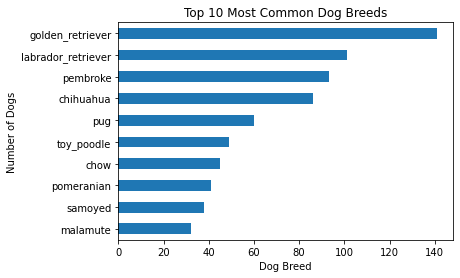

In [77]:
top_common_dogs.sort_values().plot(kind='barh')
plt.xlabel('Dog Breed')
plt.ylabel('Number of Dogs')
plt.title('Top 10 Most Common Dog Breeds');

### Insight 2:

#### Atticus is the higest rated dog

In [78]:
top_dog = df[df.name != 'None'][['name','rating_ratio']].nlargest(1,'rating_ratio')

top_dog

,name,rating_ratio
1383,Atticus,177.6


In [79]:
print(df.text[701])

Just got home from college. Dis my dog. She does all my homework. Big red turd in background. 13/10 no bias at all https://t.co/6WGFp9cuj6


### Insight 3:

#### There is a strong positive correlation between number of likes and number of retweets with puppers being the most common but doggos having generally more likes and retweets

In [80]:
df.corr().favorite_count.retweet_count

0.9239181719230247

Correlation Coefficient is approximately one. This means there is a strong positive correlation

### Visualization

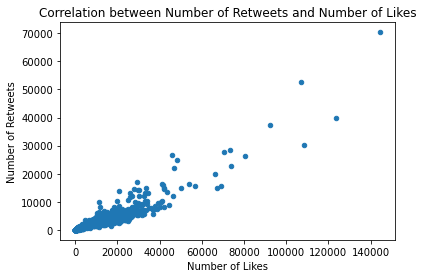

In [81]:
df.plot(x='favorite_count', y='retweet_count',kind='scatter')
plt.xlabel('Number of Likes')
plt.ylabel('Number of Retweets')
plt.title('Correlation between Number of Retweets and Number of Likes');

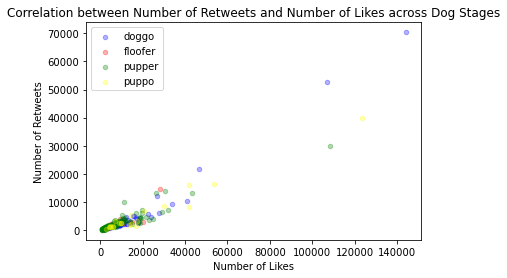

In [82]:
# Visualize based on the dog stage for further insight excluding dogs of unknown stages

# Split the dataframe based on dogs_stage
df_doggo = df[df.dogs_stage == 'doggo']
df_floofer = df[df.dogs_stage == 'floofer']
df_pupper = df[df.dogs_stage == 'pupper']
df_puppo = df[df.dogs_stage == 'puppo']

# Plot all the split dataframes on the same axis
bx = df_doggo.plot(x='favorite_count', y='retweet_count',kind='scatter',alpha = 0.3,
                   color = 'blue', label = 'doggo')
df_floofer.plot(x='favorite_count', y='retweet_count',kind='scatter',alpha = 0.3,
                color = 'red', label = 'floofer', ax = bx)
df_pupper.plot(x='favorite_count', y='retweet_count',kind='scatter',alpha = 0.3,
               color = 'green', label = 'pupper', ax = bx)
df_puppo.plot(x='favorite_count', y='retweet_count',kind='scatter',alpha = 0.3,
              color = 'yellow', label = 'puppo', ax = bx)
plt.xlabel('Number of Likes')
plt.ylabel('Number of Retweets')
plt.legend()
plt.title('Correlation between Number of Retweets and Number of Likes across Dog Stages');

### Insight 3 continued:  

#### Succesfully confirmed that puppers are the most common dog stage

In [83]:
# Group df by known dog stages only for easy analysis

dogs_stage_info = df[df['dogs_stage'] != 'None'].groupby('dogs_stage')

In [84]:
top_common_stage = dogs_stage_info['dogs_stage'].count()

top_common_stage

dogs_stage
doggo       59
floofer      8
pupper     203
puppo       22
Name: dogs_stage, dtype: int64

### Visualization

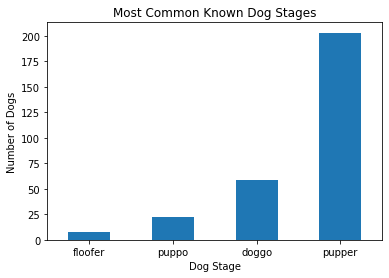

In [85]:
top_common_stage.sort_values().plot(kind='bar')
plt.xlabel('Dog Stage')
plt.ylabel('Number of Dogs')
plt.xticks(rotation = 0)
plt.title('Most Common Known Dog Stages');